<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/MULTI_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sample : CARS**

## Building a Model that predicts :  **MPG**

**Response Variable (Y) : MPG**

**Regressors or Explanatory Variables (Xi) : HP, VOL, SP and WT**

In [1]:
# Importing lib :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # To build a Model
from statsmodels.graphics.regressionplots import influence_plot # for Cook's Distance
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Loading the Dataset :**

In [2]:
# Reading the data :
cars = pd.read_csv("/content/Cars.csv")

In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
# Checking for any Null Points :
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
# Checking for any missing values :
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## **Exploratory Data Analysis (EDA) :**

In [6]:
# Correlation Matrix :
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


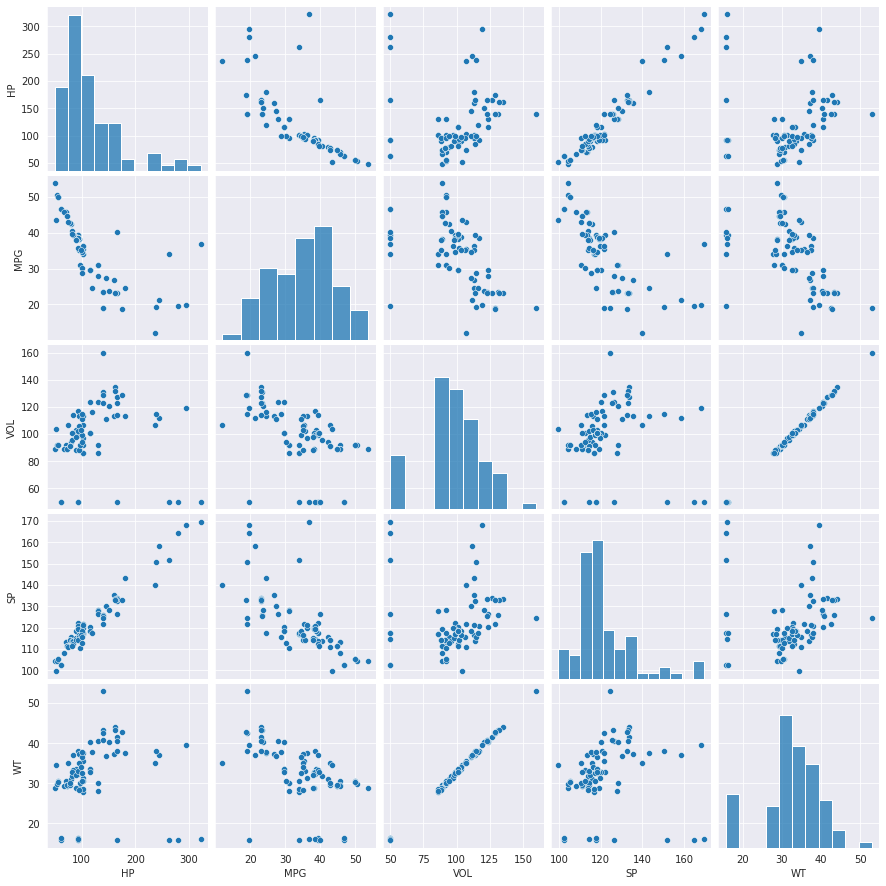

In [7]:
# Scatterplot between Variables along with Histograms :
sns.set_style(style = "darkgrid")
sns.pairplot(cars)

### **Model Building :**

In [8]:
# Build Model :
import statsmodels.formula.api as smf
model = smf.ols("MPG ~ HP + VOL + SP + WT", data = cars).fit()

In [9]:
# Coefficients :
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [10]:
# t-values and p-values :
print(model.tvalues, "\n", model.pvalues) # "\n" gives no space below.
print("\n")
print(model.tvalues, "\n\n", model.pvalues) # "\n\n" gives a space below.

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 

 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


### **Here p-value(MPG~VOL,WT) > Significance value(0.05) : So VOL and WT are considered to be Insignificant to MPG**

In [11]:
 #Rsquared Values : (Accuracy of the Model)
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

### **Simple Linear Regression Models :**

In [12]:
# MPG ~ VOL : t-values and p-values
model_vol = smf.ols("MPG ~ VOL", data = cars).fit()
print(model_vol.tvalues, "\n\n", model_vol.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 

 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


**p-value(MPG~VOL) < Significance value (0.05) : Significant**

In [13]:
# MPG ~ WT : t-values and p-values
model_wt = smf.ols("MPG ~ WT", data = cars).fit()
print(model_wt.tvalues, "\n\n", model_wt.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 

 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


**p-value(MPG~WT) < Significance value (0.05) : Significant**

In [14]:
# MPG ~ VOL + WT : t-values and p-values
model_vol_wt = smf.ols("MPG ~ VOL + WT", data = cars).fit()
print(model_vol_wt.tvalues, "\n\n", model_vol_wt.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 

 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


**When both "VOL" and "WT" put together :**

**p-value(MPG ~ VOL + WT) > Significance Value (0.05) : Insignificant**

### **Model Validation :**

In [15]:
# Calculating VIF : Rsquared and Variance Inflation Factor (VIF)

# for HP :
rsq_hp = smf.ols("HP ~ WT + SP + VOL", data = cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

# for SP :
rsq_sp = smf.ols("SP ~ HP + VOL + WT", data = cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# for VOL :
rsq_vol = smf.ols("VOL ~ HP + SP + WT", data = cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

# for WT :
rsq_wt = smf.ols("WT ~ HP + SP + VOL", data = cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

# Storing VIF Values in a dataframe
d_cars = {"Variables" : ["HP","SP","VOL","WT"], "VIF" : [vif_hp, vif_sp, vif_vol, vif_wt]}
vif_frame = pd.DataFrame(d_cars)
vif_frame

,Variables,VIF
0,HP,19.926589
1,SP,20.007639
2,VOL,638.806084
3,WT,639.533818


**For Variables having "VIF > 20" : Involve in Collinearilty**

### **VOL and WT (VIF > 20) : Multi Collinear**

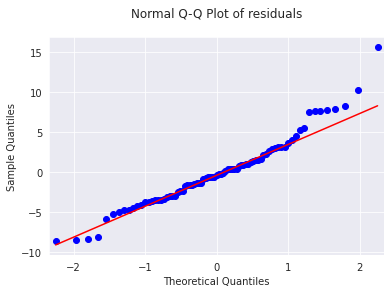

In [16]:
# Residual Analysis : Test for Normality [Q-Q Plot] :
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = "q") # line = "q" : red line with slope 45deg
plt.title("Normal Q-Q Plot of residuals\n")
plt.show()

In [17]:
list(np.where(model.resid > 10)) # listing the data points having sample Quantiles > 10 as possiple Outliers/Influencers

[array([ 0, 76])]

In [18]:
# Residual plot for Homoscedasticity - checks for pattern if exists :
def get_standardized_values(vals) :
  return (vals - vals.mean())/vals.std()

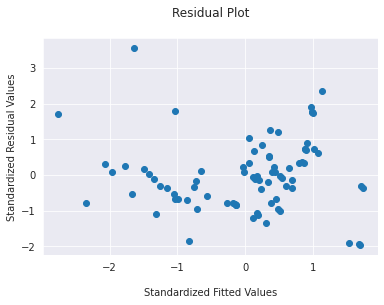

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title("Residual Plot\n")
plt.xlabel("\nStandardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show();

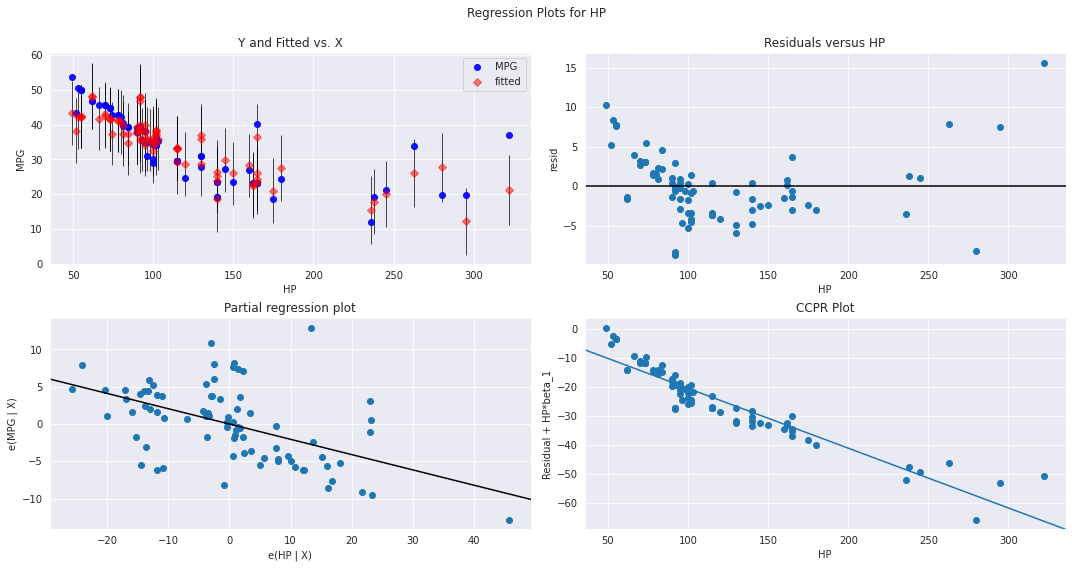

In [20]:
# Residuals vs Regressors :

# For HP :
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig = fig)
plt.show()
#Look out for the 2nd Plot "(Residuals vs HP)" for all the Regressors plots

**Residuals are independent of HP**

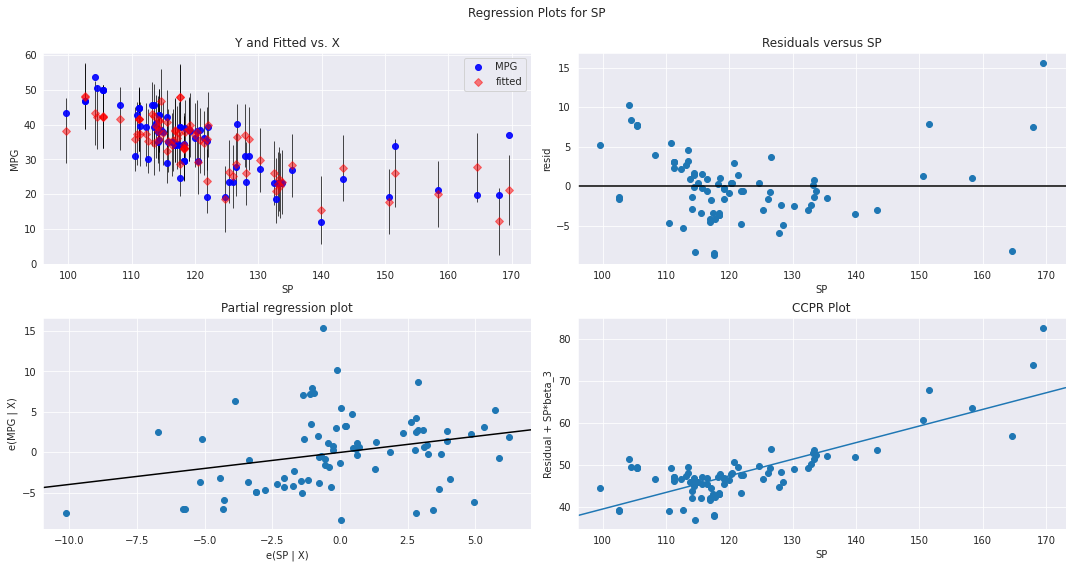

In [21]:
# For SP :
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig = fig)
plt.show()

**Residuals are independent of SP**

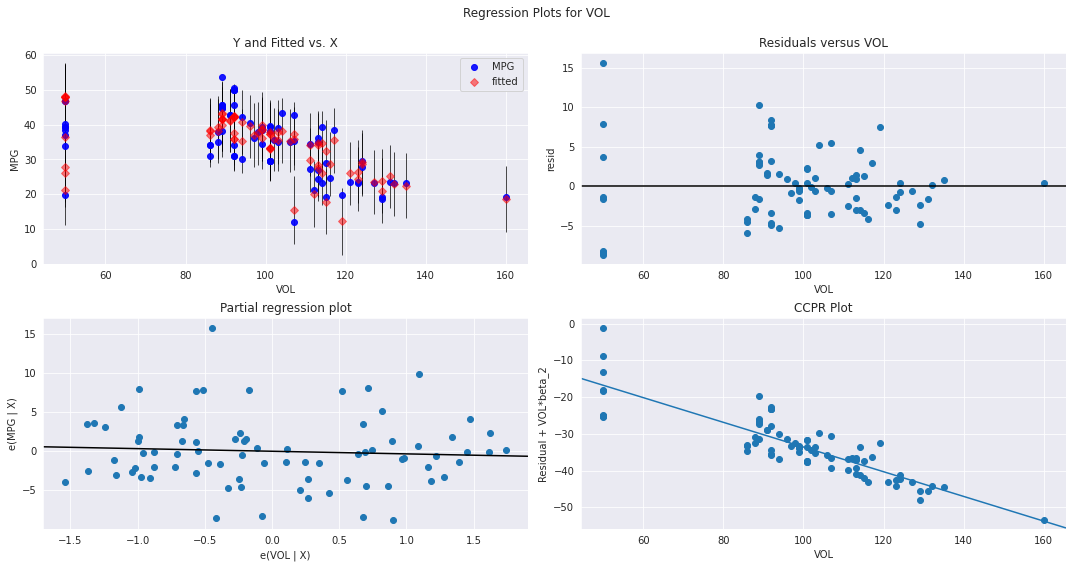

In [22]:
# For VOL :
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig = fig)
plt.show()

**Residuals are independent of VOL**

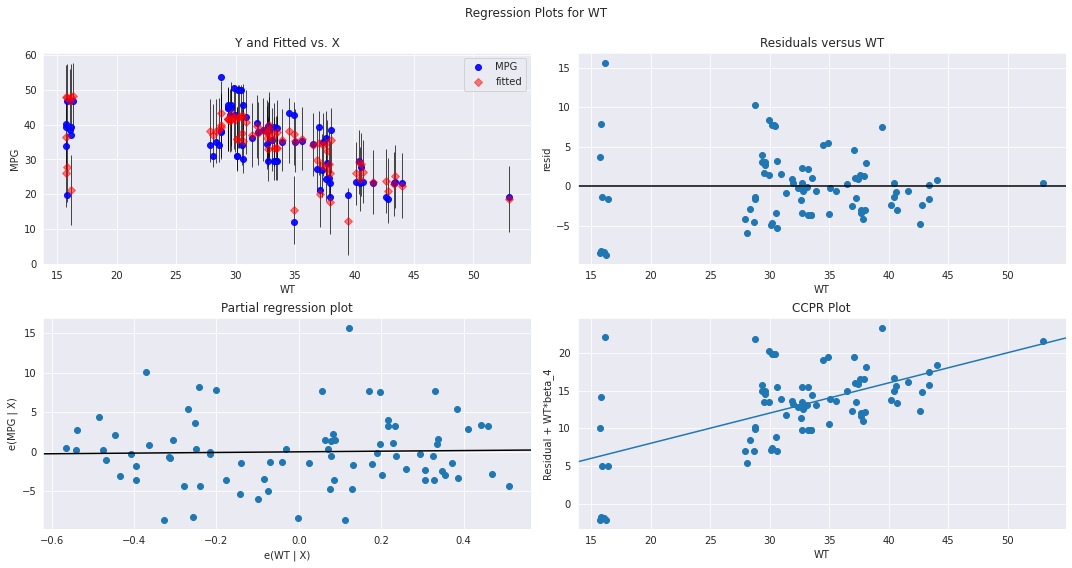

In [23]:
# For WT :
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig = fig)
plt.show()

**Residuals are independent of WT**

###**Model Deletion Diagnostics :** **Detecting Outliers**

In [24]:
# Cook's Distance :

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance # storing Cook's distance value in c and using _ for temporary placeholding a value(here it's propability values which are not required in this case.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


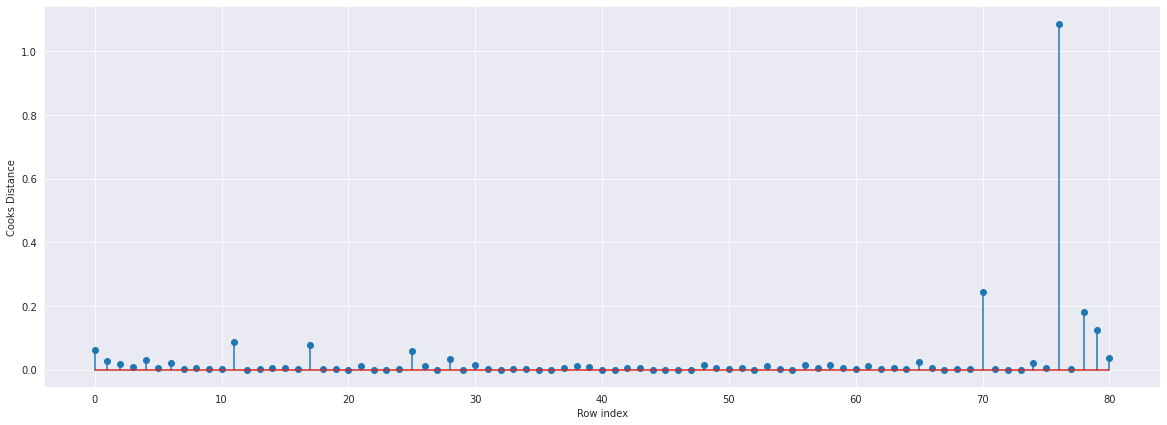

In [25]:
# Plotting Outliers/Influencers using Stem Plot :
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()
# If c > 1 : Outlier

In [26]:
# Max value of an Outlier and it's index(row) :
(np.argmax(c), np.max(c)) 

(76, 1.0865193998179883)

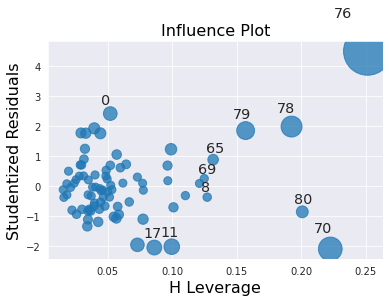

In [27]:
# High Influence Points :

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
# k : no. of Cols
# n : no. of rows

In [29]:
leverage_cutoff

0.2222222222222222

**From the above plot it is evident that data points "70 and 76" are Influencers/Outliers.**

In [30]:
cars[cars.index.isin([70,76])]
# Comparing both columns with other columns of this Data

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [31]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


###**Improving the Model :**

In [38]:
cars_new = pd.read_csv("/content/Cars.csv")

In [39]:
# Discard the Outliers/Influencers rows and reassign the row no. :

Cars = cars_new.drop(cars_new.index[[70,76]], axis = 0).reset_index()

In [40]:
Cars

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [41]:
# Drop the Original Index :

Cars = Cars.drop(["index"], axis = 1)

In [42]:
Cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


###**Model Building :**

In [43]:
# Exclude "WT" and generate R2 and AIC Values :

final_model_vol = smf.ols("MPG ~ VOL + HP + SP", data = Cars).fit()

In [44]:
(final_model_vol.rsquared, final_model_vol.aic)

(0.8161692010376007, 446.11722639447726)

In [45]:
# Exclude "VOL" and generate R2 and AIC Values :

final_model_wt = smf.ols("MPG ~ WT + HP + SP", data = Cars).fit()

In [47]:
(final_model_wt.rsquared, final_model_wt.aic)

(0.8160034320495305, 446.1884323575031)

#### **Comparing Rsquared values and AIC values : final_model_vol has high Rsquared and low AIC value hence include "VOL" so that Multi-Collinearity cease to exist.**

### **Check for Outliers/Influencers if any : Re check**

In [48]:
# Cook's Distance :

model_influence_vol = final_model_vol.get_influence()
(c_vol, _) = model_influence_vol.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, "Cook's Distance")

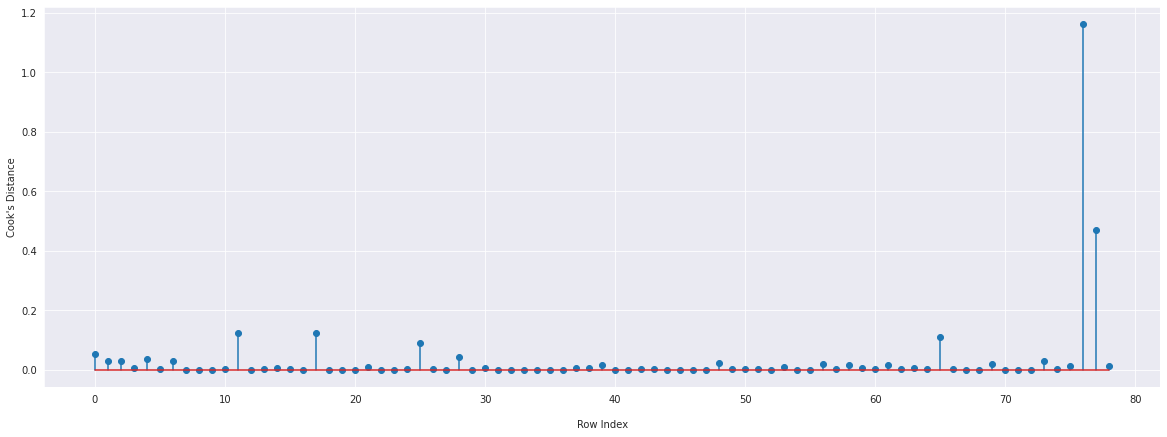

In [49]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Cars)), np.round(c_vol,3))
plt.xlabel("\nRow Index")
plt.ylabel("Cook's Distance")

Looks like we still got an Outlier left !

In [50]:
# Let's find it's Value and it's Index :
(np.argmax(c_vol), np.max(c_vol))

(76, 1.162938746913523)

In [64]:
Cars.head(80)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


**It's Pretty clear from the above recheck that 76 Row index is an Influencer and got to be removed.**

**Just in case we also remove 77 along with 76 row index**

In [65]:
# Improving the Model :

# Drop 76 and 77 Observations :
Cars_new = Cars.drop(Cars.index[[76,77]], axis = 0)

In [66]:
Cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [67]:
# Reset the Index and re arrange Row Values :
Cars_1 = Cars_new.reset_index()

In [68]:
Cars_2 = Cars_1.drop(["index"], axis = 1)

In [69]:
Cars_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [70]:
# Build the Model on the New data :

final_model_vol = smf.ols("MPG ~ HP + SP + VOL", data = Cars_2).fit()

In [71]:
# Re Check for any Outliers/Influencers :

model_influence_vol = final_model_vol.get_influence()
(c_vol, _) = model_influence_vol.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, "Cook's Distance")

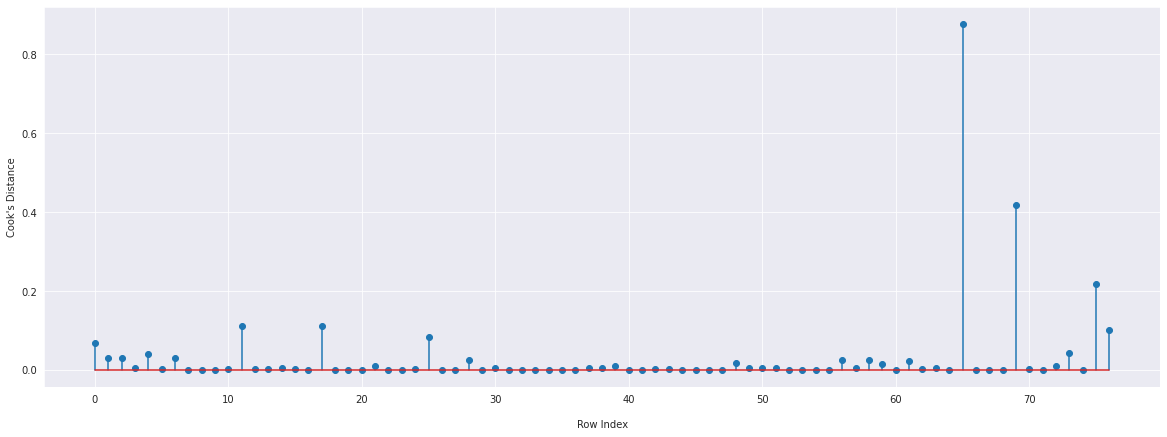

In [72]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Cars_2)), np.round(c_vol,3))
plt.xlabel("\nRow Index")
plt.ylabel("Cook's Distance")

In [73]:
# Let's check if any data point value crosses 1 :
(np.argmax(c_vol), np.max(c_vol))

(65, 0.8774556986296596)

**Since all the values are less than 1 we stop the Diagnostic process and Finalize the Model**

### **Model Deployment :**

In [76]:
# Check the accuracy of the Model : FINAL MODEL
final_model_vol = smf.ols("MPG ~ VOL + HP + SP", data = Cars_2).fit()

In [75]:
(final_model_vol.rsquared, final_model_vol.aic)

(0.8669636111859063, 409.4153062719508)

## **Predicting Values for New Data :**

In [77]:
# New Data for Prediction :

new_data = pd.DataFrame({"HP" : 40, "VOL" : 95, "SP" : 102, "WT" : 35}, index = [1])

In [79]:
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [80]:
final_model_vol.predict(new_data)
#Returns the MPG Value :

1    46.035594
dtype: float64